In [1]:
import pandas as pd
import numpy as np

# Análisis del dataset

In [21]:
df = pd.read_csv("../1.Limpieza de datos/cleaning_youtoxic.csv",   sep = ",", encoding ='utf-8')

In [22]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,people step case nt people situation lump m...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement trained shoot apprehend trai...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,nt reckon black lives matter banners held whit...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,large number people like police officers calle...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,Arab dude absolutely right shot extra time S...,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


### 1000 registros de comentarios .  
#### Columnas:
<ol>  
    <li>CommentId: tipo string . Contiene identificador del comentario</li>
    <li>VideoId: tipo string . Contiene identificador del video asociado al comentario</li>
<li>Text: tipo string . Contiene comentario de texto</li>
<li> IsToxic : tipo boleano </li>
<li>IsAbusive        : tipo boleano </li>
<li>IsThreat        : tipo boleano </li>
<li> IsProvocative   : tipo boleano </li>
<li> IsObscene       : tipo boleano </li>
<li> IsHatespeech     : tipo boleano </li>
<li> IsRacist         : tipo boleano </li>
<li> IsNationalist    : tipo boleano </li> 
<li> IsSexist         : tipo boleano </li> 
<li> IsHomophobic     : tipo boleano </li>
<li> IsReligiousHate : tipo boleano </li>  
<li> IsRadicalism : tipo boleano </li> 


</ol>

#### 15 columnas : 3 de tipo string y 12 booleanas

In [24]:
# Verifico valores nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

#### Ninguna columna tiene valores nulos

### Verificar si hay algun comentario vacío o de una sola palabra

In [25]:
# Obtener la fila de un comentario vacio o con una palabra
for i,text in enumerate(df["Text"]):
    if len(text) == 1 or len(text) == 0:
        print(f'Fila a analizar: {i}')

Fila a analizar: 111


In [26]:
df.loc[111]

CommentId          UgisXJAFxN9xb3gCoAEC
VideoId                     04kJtp6pVXI
Text                                  👍
IsToxic                           False
IsAbusive                         False
IsThreat                          False
IsProvocative                     False
IsObscene                         False
IsHatespeech                      False
IsRacist                          False
IsNationalist                     False
IsSexist                          False
IsHomophobic                      False
IsReligiousHate                   False
IsRadicalism                      False
Name: 111, dtype: object

#### En la fila 111 hay un comentario de no odio , cuyo texto es un emoji --> En función del tratamiento posterior a los emojis , decidiremos que hacer con este comentario

### Cuantificacion de la cantidad de  videos que tiene el dataset 

In [38]:
# Cantidad de comentarios por video
df["VideoId"].value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

In [39]:
df.groupby("VideoId").VideoId.nunique().sum()

13

#### Los comentarios del dataset corresponden a 13 videos

###  Distribucion del porcentaje de comentarios por video

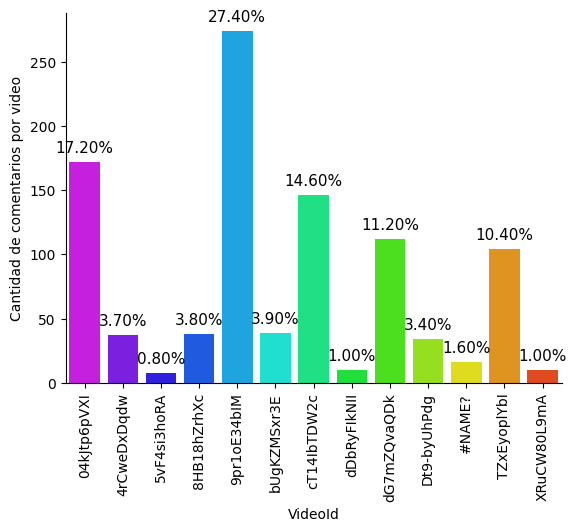

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x="VideoId",data=df, palette="gist_rainbow_r")
plt.ylabel("Cantidad de comentarios por video")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    plt.xticks(rotation=90)
plt.show()

# Ingeniería de características

###### Con el objetivo de reducir la cantidad de caracteristicas , y viendo que hay 12 columnas booleanas, donde cada columna representa una caracteristica de un mensaje de odio
###### Partiendo de la hipótesis de que si un comentario , tiene algun valor de esas columnas como True, significa que es un mensaje de odio. 
###### Se creará una nueva columna denominada is_hate, de tipo booleana, cuyo valor será True si si alguna registro del resto de las columnas booleanas es true o false si el resto de registros booleanos es false

In [53]:
# Calcular la columna is_hate en base a las columnas booleanas
def create_column_isHate(df):
    df_is_hate = []
    #Para crear la columna is_hate lo hago en base a los valores booleanos de las columnas contenidas lista --> Si alguna tiene valor
    #True , entonces el valor de la columna is_hate es 1
    for row in range(len(df)):
        if df.iloc[row]["IsToxic"] == True or df.iloc[row]["IsAbusive"] == True or df.iloc[row]["IsThreat"] == True or df.iloc[row]["IsProvocative"] == True   or df.iloc[row]["IsObscene"] == True or df.iloc[row]["IsHatespeech"]  or df.iloc[row]["IsRacist"] == True    or df.iloc[row]["IsNationalist"] == True or df.iloc[row]["IsHomophobic"] == True or df.iloc[row]["IsReligiousHate"] == True  or df.iloc[row]["IsRadicalism"] == True  or df.iloc[row]["IsSexist"] == True:
            df_is_hate.append(True) 
        else:
            df_is_hate.append(False)       
    df["is_hate"] = df_is_hate
    return df


In [54]:
# Nuevo dataframe
df =create_column_isHate(df)

In [55]:
df

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,is_hate
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,people step case nt people situation lump m...,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement trained shoot apprehend trai...,True,True,False,False,False,False,False,False,False,False,False,False,True
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,nt reckon black lives matter banners held whit...,True,True,False,False,True,False,False,False,False,False,False,False,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,large number people like police officers calle...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,Arab dude absolutely right shot extra time S...,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ugi5ADt10EdDz3gCoAEC,XRuCW80L9mA,remember sent national defence,False,False,False,False,False,False,False,False,False,False,False,False,False
996,Ugifh2DMhBbDkHgCoAEC,XRuCW80L9mA,Stats nt represent problem Race baiting attitu...,True,False,False,False,False,True,True,False,False,False,False,False,True
997,Ugj_plbGBjjzYXgCoAEC,XRuCW80L9mA,quote mother Wow hit hard accurate,False,False,False,False,False,False,False,False,False,False,False,False,False
998,Ugj0bah1De8xy3gCoAEC,XRuCW80L9mA,video racist,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Cantidad de comentarios de odio por video

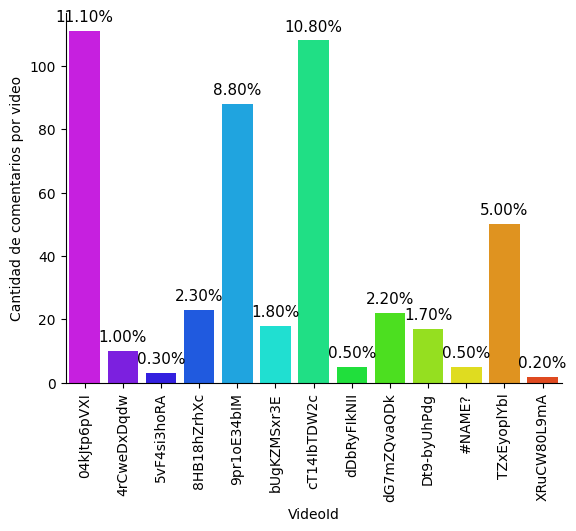

In [57]:
data_hateSpeech =df.loc[(df["is_hate"]==True)]
ax = sns.countplot(x="VideoId",data=data_hateSpeech, palette="gist_rainbow_r")
plt.ylabel("Cantidad de comentarios por video")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
    plt.xticks(rotation=90)
plt.show()

#### Eliminar columnas por relevantes en nuestra prediccion:
Se eliminan las columnas identificadoras de video y comentario porque no considerarse relavantes para nuestro algoritmo predictor

In [58]:
# Eliminar columnas CommentId y VideoId
df = df.drop(['CommentId','VideoId'], axis=1)

### Visualizacion de cantidad de comentarios de cada tipo (columnas booleanas) que hay en dataset

In [61]:
def porcentaje_grafico(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,11),textcoords="offset points")

Categoría del comentario:

IsToxic
False    538
True     462
Name: IsToxic, dtype: int64

IsAbusive
False    647
True     353
Name: IsAbusive, dtype: int64

IsThreat
False    979
True      21
Name: IsThreat, dtype: int64

IsProvocative
False    839
True     161
Name: IsProvocative, dtype: int64

IsObscene
False    900
True     100
Name: IsObscene, dtype: int64

IsHatespeech
False    862
True     138
Name: IsHatespeech, dtype: int64

IsRacist
False    875
True     125
Name: IsRacist, dtype: int64

IsNationalist
False    992
True       8
Name: IsNationalist, dtype: int64

IsSexist
False    999
True       1
Name: IsSexist, dtype: int64

IsHomophobic
False    1000
Name: IsHomophobic, dtype: int64

IsReligiousHate
False    988
True      12
Name: IsReligiousHate, dtype: int64

IsRadicalism
False    1000
Name: IsRadicalism, dtype: int64



C:\Users\pdega\AppData\Local\Temp\ipykernel_6176\1770845121.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,(i+1))
C:\Users\pdega\AppData\Local\Temp\ipykernel_6176\1770845121.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,(i+1))
C:\Users\pdega\AppData\Local\Temp\ipykernel_6176\1770845121.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4,(i+1))
C:\Users\pdega\AppData\Local\Temp\ipykernel_6176\1770845121.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicit

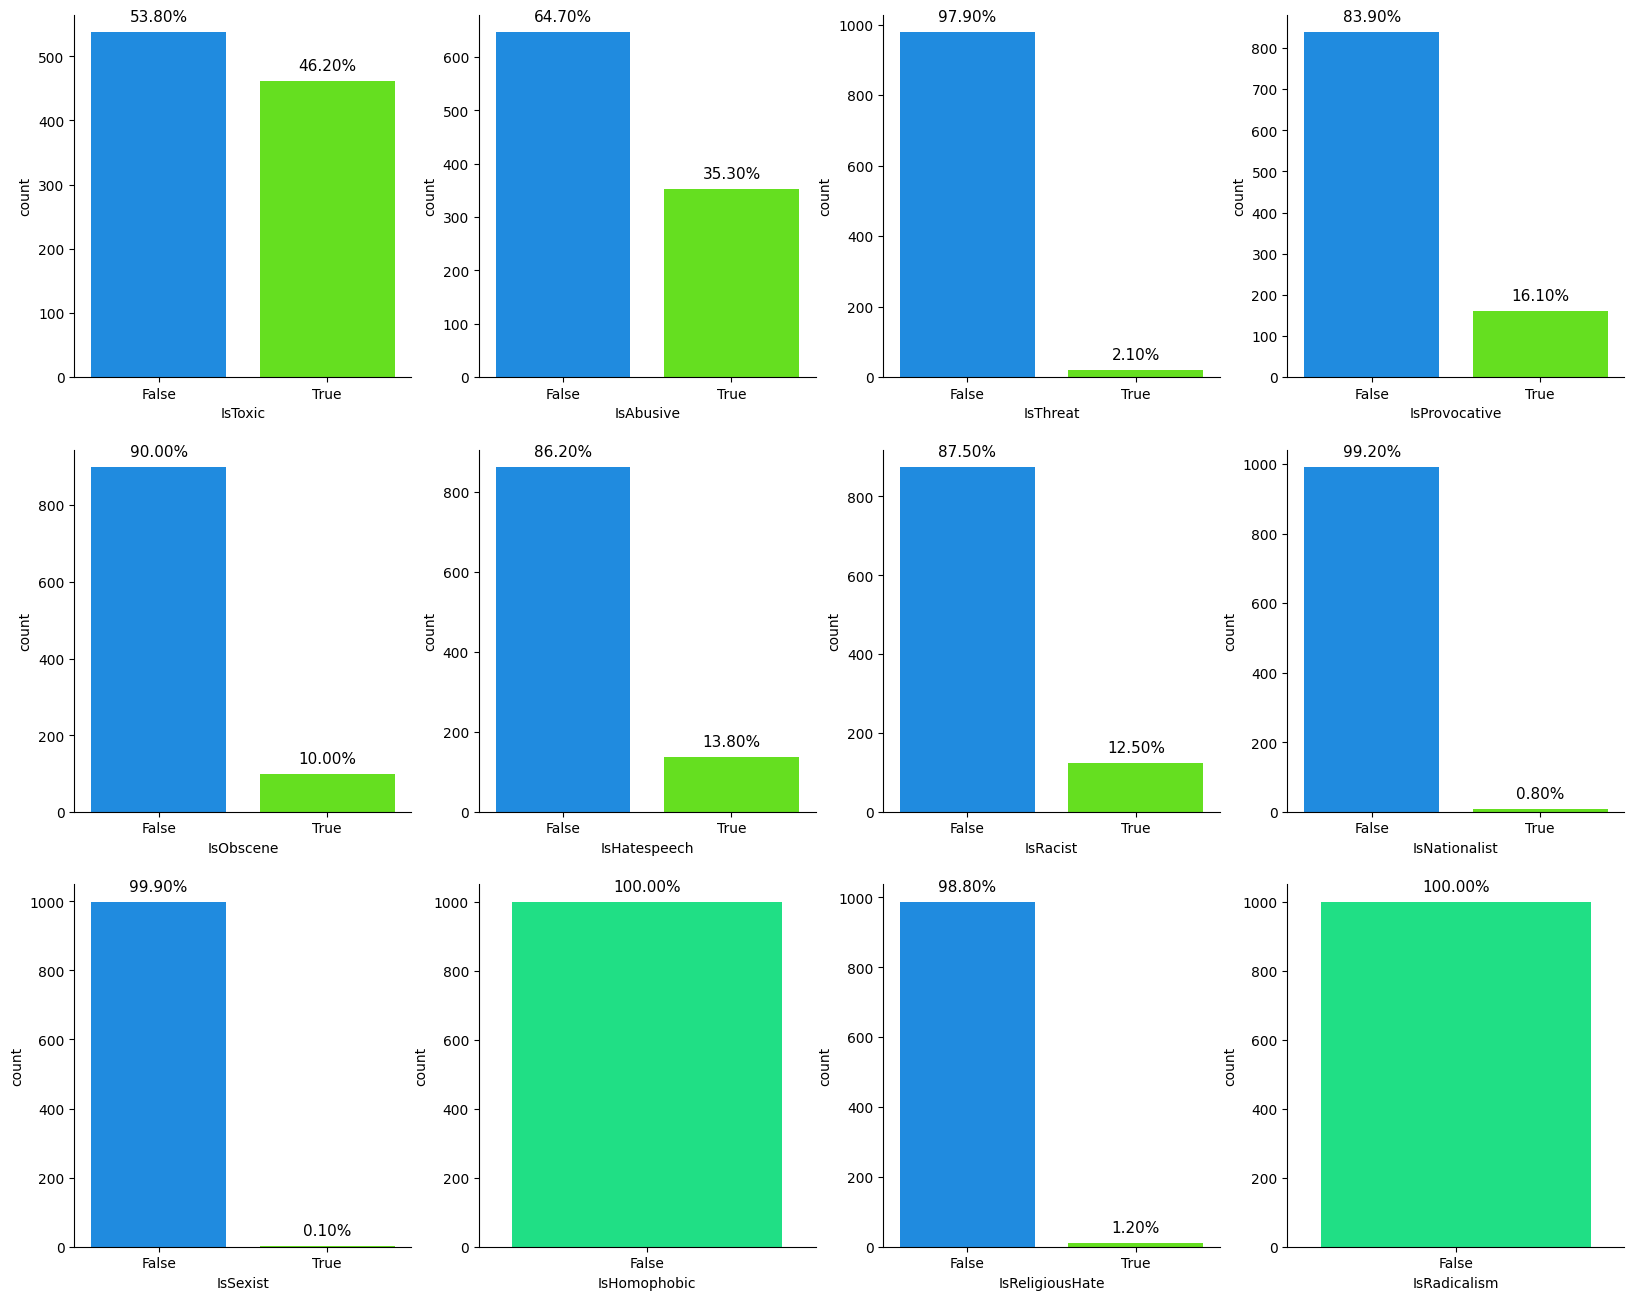

In [65]:
variables_binarias=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism"]
# Conteo de cada una de las categorías.
print(f"Categoría del comentario:")
print()
for col in variables_binarias:
    print(f"{col}")
    print(df[col].value_counts())
    print()

fig,axes=plt.subplots(nrows=3,ncols=5,figsize=(20,16))
for i,item in enumerate(variables_binarias): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="gist_rainbow_r")
    plt.xlabel(str(item))
    #plt.title("Categorias de Toxicidad "+str(item))
    i=i+1
    porcentaje_grafico(ax)
plt.show()

#### Del gráfico se observa que no hay comentarios calificados como radical u homofobico  (Los mil comentarios tienen valor False es las columnas isRadicalism y isHomophobic). Asimismo hay pocos comentarios sexistas, de odio religioso, nacionalistas y amenazantes. La mayoria de los comentarios de odio son abusivos o toxicos.

### Correlación lineal de variables o caracteristicas con mapa de calor de correlaciones

La correlación lineal es un método estadístico que permite cuantificar la relación lineal existente entre dos variables. Existen varios estadísticos, llamados coeficientes de correlación lineal, desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son Pearson, Spearman y Kendall.

In [66]:
from matplotlib import style

C:\Users\pdega\AppData\Local\Temp\ipykernel_6176\4072804522.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
C:\Users\pdega\AppData\Local\Temp\ipykernel_6176\4072804522.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,


<AxesSubplot: >

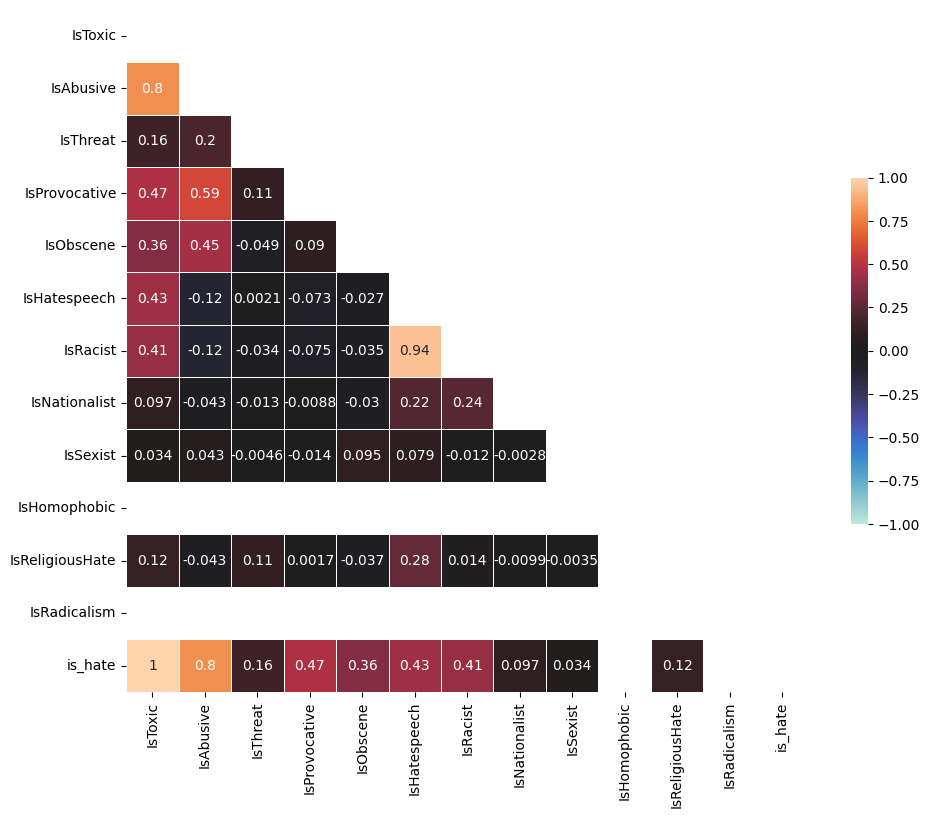

In [67]:
# Heatmap matriz de correlaciones
# ==============================================================================
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Del mapa de calor de las correlaciones anterior, se observa que hay una alta asociacion(coeficiente de correlacion 1) enre caracteristica is_hate con caracteristica is_toxic. Dado que la columna is_hate se construyo en base al resto de columnas booleanas, quiere decir que la columna is_toxic es la variable a predecir, ya que define cuando un mensaje es de odio o no. 

##### Por lo expuesto anteriormente, nos quedamos con las columnas is_toxic y Text, y eliminamos al resto de columnas de tipo booleano

In [68]:
df = df.drop(['is_hate', 'IsAbusive', 'IsThreat','IsProvocative', 'IsHatespeech', 'IsObscene','IsRacist', 'IsNationalist', 'IsHomophobic','IsReligiousHate','IsRadicalism','IsSexist'], axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     1000 non-null   object
 1   IsToxic  1000 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 8.9+ KB


#### Verificar balanceo de los datos

In [70]:
msg_hate =df.apply(lambda x: x['IsToxic'] == 1, axis=1).sum()
msg_nohate=df.apply(lambda x: x['IsToxic'] == 0, axis=1).sum()
total =msg_hate +msg_nohate

In [71]:
print(f"Cantidad de mensajes de odio: {msg_hate} --- Procentaje en relación al total :{(msg_hate /total)*100} %")
print(f"Cantidad de mensajes de no odio: {msg_nohate}--- Procentaje en relación al total :{round((msg_nohate /total),3)*100} %")

Cantidad de mensajes de odio: 462 --- Procentaje en relación al total :46.2 %
Cantidad de mensajes de no odio: 538--- Procentaje en relación al total :53.800000000000004 %


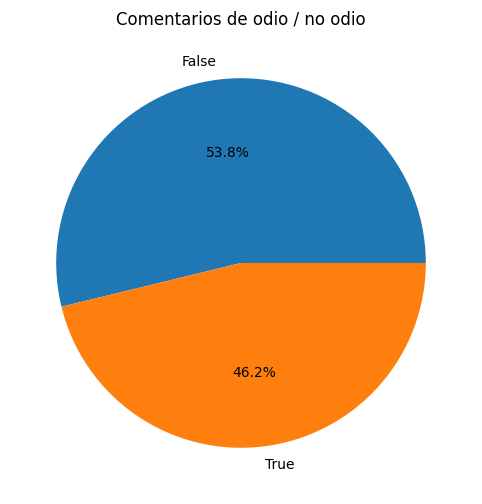

In [72]:
# grafica de tarta
fig, ax = plt.subplots(figsize = (8, 6))
sizes = [count for count in df['IsToxic'].value_counts()]
labels = list(df['IsToxic'].value_counts().index)
explode = (0.1, 0.1, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%')
ax.set_title('Comentarios de odio / no odio')
plt.show()

<AxesSubplot: xlabel='IsToxic', ylabel='count'>

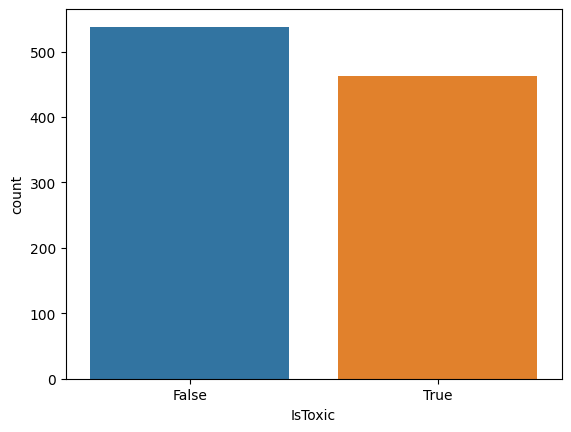

In [73]:
sns.countplot(data=df,x="IsToxic")

#### Hay 462 comentarios clasificados como de odio(46,2%) y 538(53,8%) comentarios de no odio , por lo tanto el dataset se encuentra banceado (Como se observa en el grafico circular y el grafico de columnas)

### Cantidad de palabras por cada comentarios para cada categoria (Odio/No odio)

C:\Users\pdega\AppData\Local\Temp\ipykernel_9880\3649524336.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comentario_odio_len, kde=False, color='blue', ax=axes[0]).set_title('Longitud de los comentarios  de odio');
C:\Users\pdega\AppData\Local\Temp\ipykernel_9880\3649524336.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

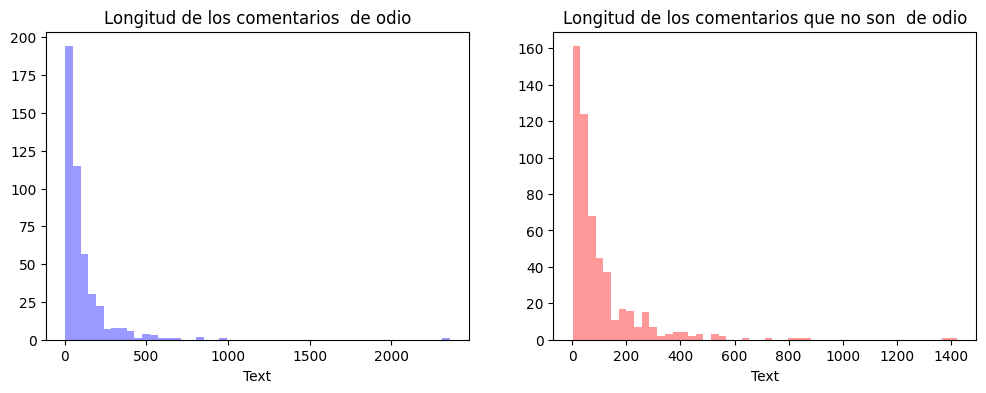

In [478]:
comentario_odio_len = df[df['IsToxic']==1]['Text'].str.len()
comentario_noodio_len = df[df['IsToxic']==0]['Text'].str.len()
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(comentario_odio_len, kde=False, color='blue', ax=axes[0]).set_title('Longitud de los comentarios  de odio');
sns.distplot(comentario_noodio_len, kde=False, color='red', ax=axes[1]).set_title('Longitud de los comentarios que no son  de odio');

In [479]:
total =comentario_odio_len.sum() +comentario_noodio_len.sum()
avg_hate= comentario_odio_len.sum() /1000
avg_nohate= comentario_noodio_len.sum() /1000

print(f"Promedio de numero de palabras de comentarios de odio: {avg_hate}")
print(f"Promedio de numero de palabras de comentarios de no odio: {avg_nohate}")

Promedio de numero de palabras de comentarios de odio: 50.346
Promedio de numero de palabras de comentarios de no odio: 54.575


C:\Users\pdega\AppData\Local\Temp\ipykernel_9880\26963042.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_palabras_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Discurso de Odio');
C:\Users\pdega\AppData\Local\Temp\ipykernel_9880\26963042.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

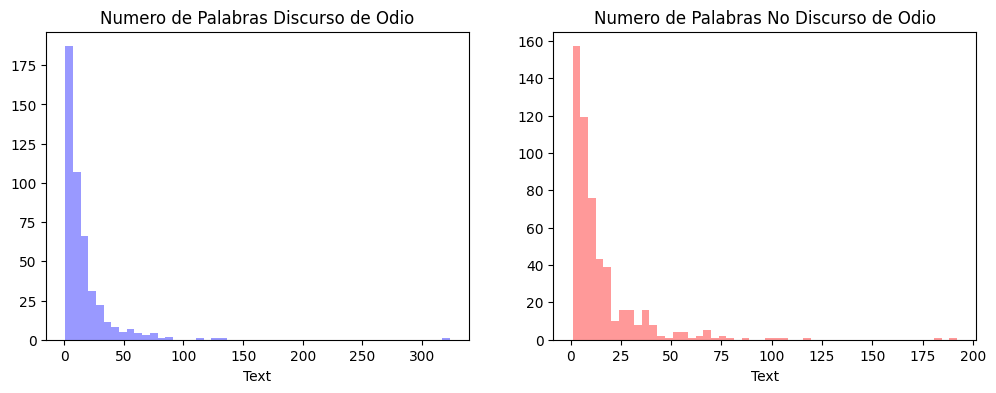

In [480]:
num_palabras_discurso_odio = df[df['IsToxic']==1]['Text'] \
                            .str.split().map(lambda x: len(x))

num_palabras_no_discurso_odio = df[df['IsToxic']==0]['Text'] \
                            .str.split().map(lambda x: len(x))
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(num_palabras_discurso_odio, kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Discurso de Odio');

sns.distplot(num_palabras_no_discurso_odio, kde=False, color='red', ax=axes[1]).set_title('Numero de Palabras No Discurso de Odio');

### Palabras únicas del corpus de texto

In [481]:
unique_words_hate = df[df['IsToxic'] == 1]['Text'].apply(lambda x: len(set(str(x).split())))
unique_words_nohate = df[df['IsToxic']  == 0]['Text'].apply(lambda x: len(set(str(x).split())))

C:\Users\pdega\AppData\Local\Temp\ipykernel_9880\402612793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unique_words_hate , kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Únicas Discurso de Odio');
C:\Users\pdega\AppData\Local\Temp\ipykernel_9880\402612793.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

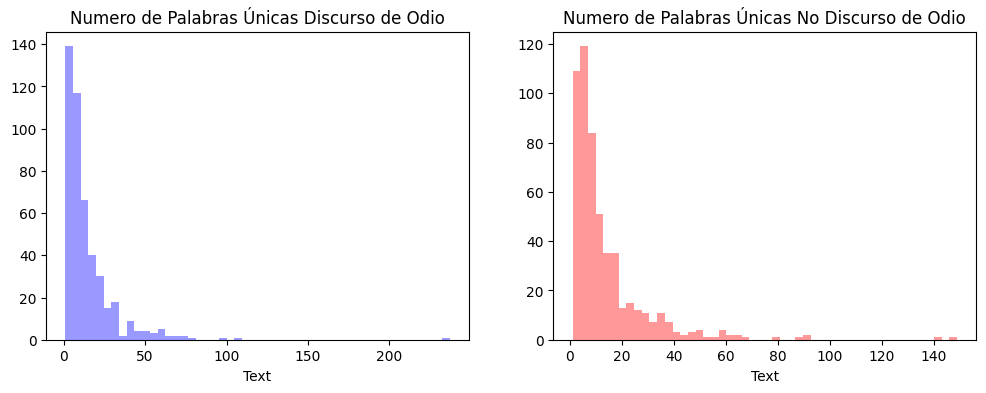

In [483]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.distplot(unique_words_hate , kde=False, color='blue', ax=axes[0]).set_title('Numero de Palabras Únicas Discurso de Odio');
sns.distplot(unique_words_nohate, kde=False, color='red', ax=axes[1]).set_title('Numero de Palabras Únicas No Discurso de Odio');

In [484]:
print(f'Numero de palabras unicas en comentarios de odio: {unique_words_hate.sum()}') 
print(f'Numero de palabras unicas en comentarios de no odio: {unique_words_nohate.sum()}') 

Numero de palabras unicas en comentarios de odio: 6796
Numero de palabras unicas en comentarios de no odio: 7098


## Palabras significativas

### Palabras significativas en comentarios de odio

In [485]:
from textblob import TextBlob
from wordcloud import WordCloud

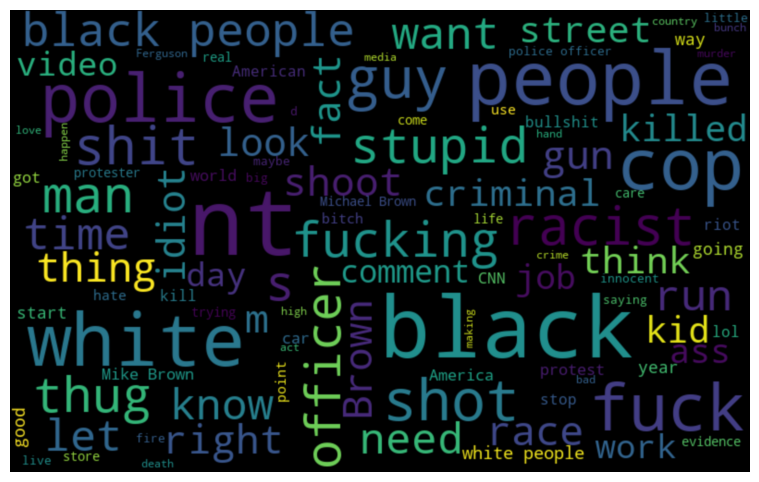

In [486]:
# Configuramos nube de palabras más significativas
txt = ' '.join(text for text in df[df['IsToxic']==1]['Text'])
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud,interpolation = 'bicubic')
plt.axis('off')
plt.show()

### Palabras significativas en comentarios de no odio

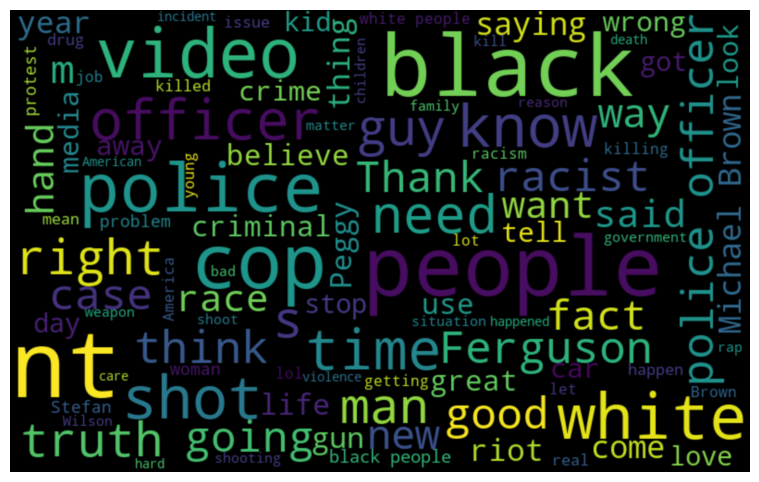

In [487]:
# Configuramos nube de palabras más significativas
txt = ' '.join(text for text in df[df['IsToxic']==0]['Text'])
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud,interpolation = 'bicubic')
plt.axis('off')
plt.show()

## Procesado de columna Text

#### En la limpieza de datos, se eliminaron los stop words y los carácteres poco significativos

In [488]:
# Importa spaCy
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk import SnowballStemmer


#### Cuantificacion de la cantidad de  videos que tiene el dataset 

In [489]:
# Crea un objeto nlp vacío para procesar ingles --> pipeline de procesamiento
nlp = spacy.load("en_core_web_sm")

# Para obtener las raices de una palbra
stemmer=SnowballStemmer('english')

### Emoticonos y emojis

In [490]:
nlp.add_pipe("emoji", first=True)


In [491]:
# Creo dos data frame : extraigo con mensajes de odio y extraigo sin mensajes de odio
df_odio= df[df['IsToxic']==1]
df_no_odio= df[df['IsToxic']==0]

In [492]:
# Para mostrar los mensajes de odio en el texto

def mostrar_emojis_por_comentario(df):
    lista =[]
    index = 0
    for text in df:
        doc = nlp(text)
        if doc._.has_emoji:
            for i in doc._.emoji:
                lista.append(i)
    return lista

#### Emojis de mensajes de odio

In [493]:
emoji_odio= mostrar_emojis_por_comentario(df_odio['Text'])

In [494]:
emoji_odio

[('💀', 4, 'skull'),
 ('💀', 5, 'skull'),
 ('😡', 4, 'pouting face'),
 ('🙄', 11, 'face with rolling eyes'),
 ('🙄', 12, 'face with rolling eyes'),
 ('🤦 \u200d ♂ ️', 8, None),
 ('😂', 5, 'face with tears of joy'),
 ('😭', 6, 'loudly crying face')]

#### Emojis de mensajes de no odio

In [495]:
emoji_no_odio= mostrar_emojis_por_comentario(df_no_odio['Text'])

In [496]:
emoji_no_odio

[('👍', 0, 'thumbs up'),
 ('😔', 6, 'pensive face'),
 ('🤔', 4, 'thinking face'),
 ('🤔', 5, 'thinking face')]

### Eliminar emojis

In [511]:
def eliminar_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [528]:
df_sinemojis= df.copy()

In [529]:
#Nuevo dataframe sin emojis en la columna Text
df_sinemojis['Text'] = df_sinemojis['Text'].apply(eliminar_emojis)

In [530]:
# Se verifica que ya no existen emojis en el texto 
emojis_clean=mostrar_emojis_por_comentario(df_sinemojis['Text'])

In [531]:
emojis_clean

[]

In [532]:
df_sinemojis

,Text,IsToxic
0,people step case nt people situation lump m...,False
1,Law enforcement trained shoot apprehend trai...,True
2,nt reckon black lives matter banners held whit...,True
3,large number people like police officers calle...,False
4,Arab dude absolutely right shot extra time S...,False
...,...,...
995,remember sent national defence,False
996,Stats nt represent problem Race baiting attitu...,True
997,quote mother Wow hit hard accurate,False
998,video racist,False


## Se verifica si algún comentario ha quedado con valor nulo (porque solo tenía un emoji) despues de eliminar los emojis

In [533]:
df_sinemojis.isnull().sum()

Text       0
IsToxic    0
dtype: int64

### En la parte de analisis de comentarios con una palabra o vacios, nos dimos cuenta que el comentario de la fila 111 solo tenía un emoji como texto. Vemos como ha quedado la fila , después de eliminar los emojis

In [534]:
df_sinemojis.loc[111]

Text            
IsToxic    False
Name: 111, dtype: object

In [537]:
len(df_sinemojis.loc[111:]["Text"])

889

#### El nuevo dataframe sin emojis no tiene valores nulos, pero la fila 111 , en la columna Text hay un valor vacio (string de longitud 0) . Por tratrarse de un solo registro , se toma la decisión de borrar ese registro.

In [541]:
df_sinemojis=df_sinemojis.drop(111)

In [546]:
df_sinemojis[100:114]

,Text,IsToxic
100,CNN joke,True
101,wonder police expect happen continually abuse ...,True
102,nt want sons death vain LETS BURN BITCH Stupid...,True
103,guy hero,False
104,sound spitting Arab expression,False
105,Wow,False
106,think indecent unessacerry event person shot M...,False
107,genuine failure leadership President United St...,True
108,know irradiating commercial strawberry seeds w...,False
109,Arabs Hate black people ISIS sympathizer wants...,True


In [543]:
df_sinemojis.value_counts().sum()

999

In [551]:
df_sinemojis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     999 non-null    object
 1   IsToxic  999 non-null    bool  
dtypes: bool(1), object(1)
memory usage: 48.9+ KB


## Guardar dataframe resultante en archivo en formato csv

In [557]:
# Reestablecer indice correlativo tras haber eliminado una fila
df_sinemojis.reset_index(inplace=True, drop=True)

In [558]:
df_sinemojis.to_csv('comentarios_sin_emojis.csv',index=False)